## DECISION TREE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv(r"C:\Users\basav\Downloads\Decision Tree\Decision Tree\heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [7]:
df.shape

(908, 13)

In [9]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False,False
906,False,False,False,False,False,False,False,False,False,True,False,False,False


In [11]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [17]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


<Figure size 1000x600 with 0 Axes>

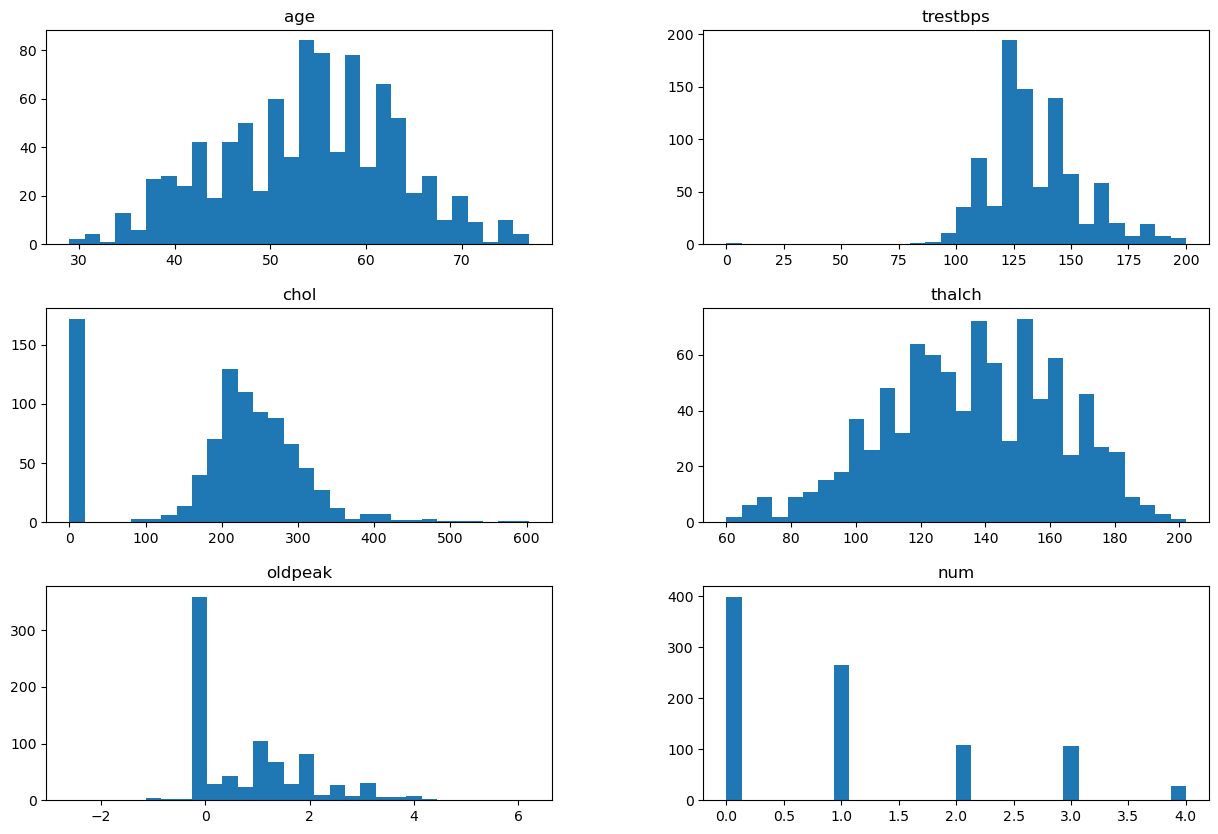

In [21]:
plt.figure(figsize=(10, 6))
df.hist(bins=30, figsize=(15, 10), grid=False)
plt.show()

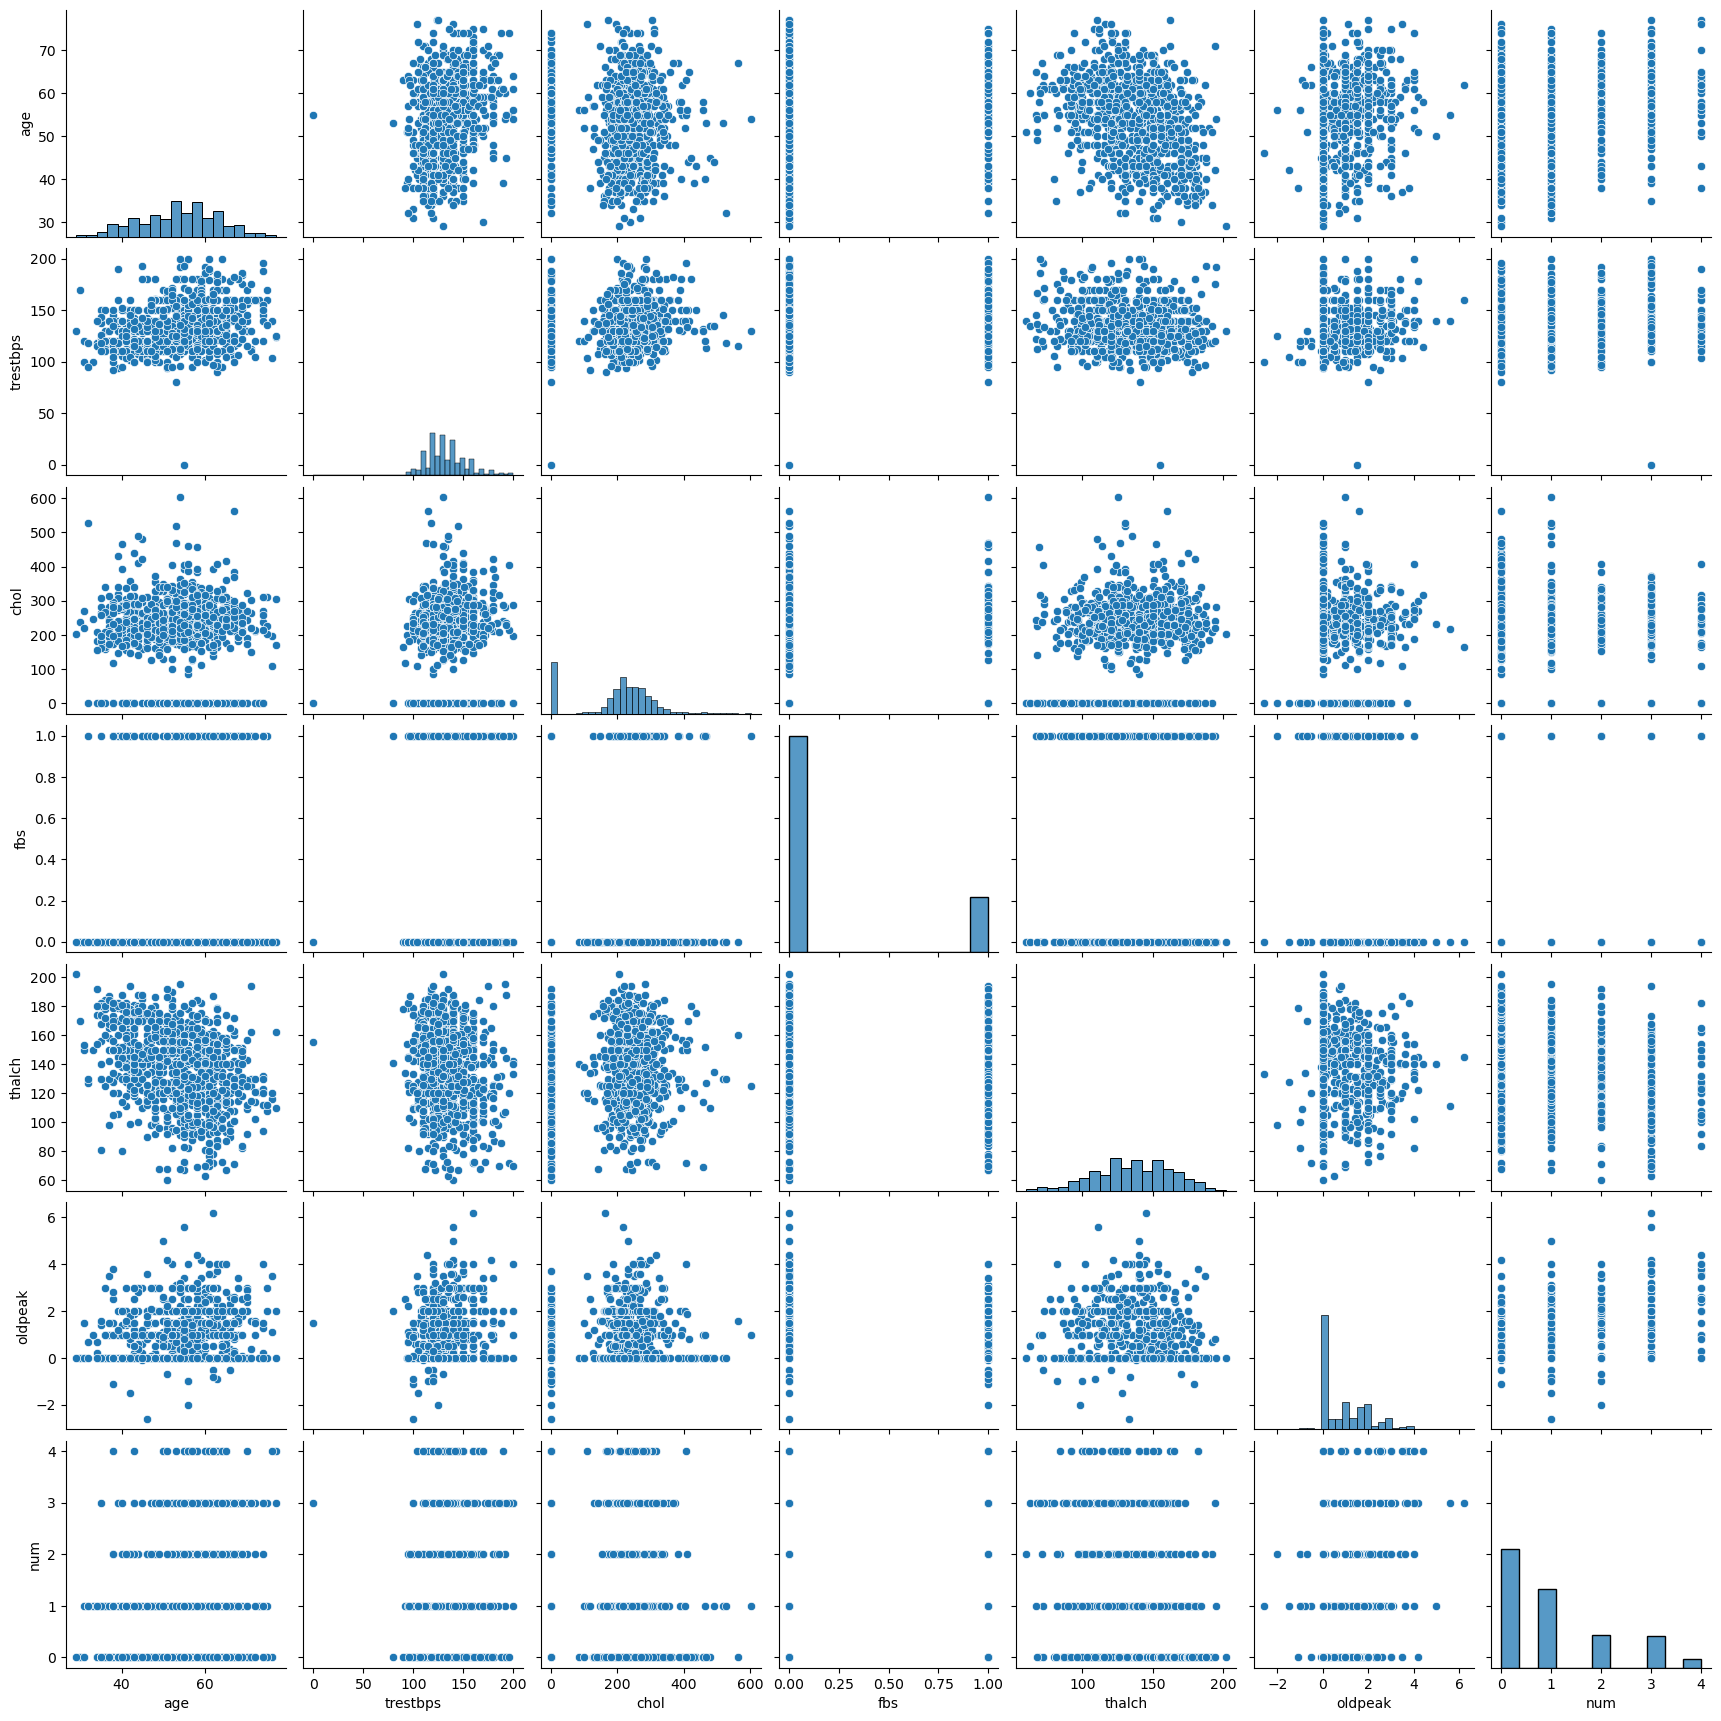

In [23]:
sns.pairplot(df)
plt.show()

In [31]:
df = pd.get_dummies(df, drop_first=True)

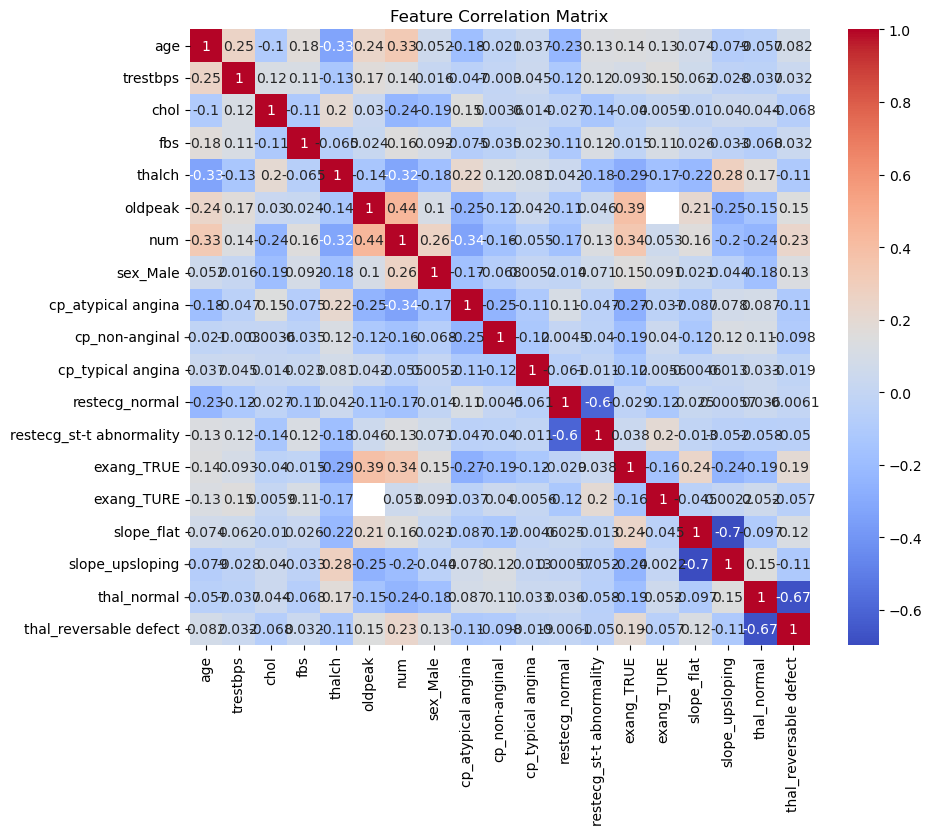

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [35]:
df.isnull().sum()

age                          0
trestbps                     0
chol                         0
fbs                          0
thalch                       0
oldpeak                     62
num                          0
sex_Male                     0
cp_atypical angina           0
cp_non-anginal               0
cp_typical angina            0
restecg_normal               0
restecg_st-t abnormality     0
exang_TRUE                   0
exang_TURE                   0
slope_flat                   0
slope_upsloping              0
thal_normal                  0
thal_reversable defect       0
dtype: int64

In [37]:
df = df.fillna(df.mean()) 

In [43]:
X = df.drop('num', axis=1)  
y = df['num']

In [47]:
X

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,True,False,False,True,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.000000,True,True,False,False,True,False,False,False,True,False,False,False
2,57,140,192,False,148,0.400000,True,False,False,False,True,False,False,False,True,False,False,False
3,52,118,186,False,190,0.000000,True,False,False,True,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.500000,True,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,True,False,False,False,True,False,False,False,False,True,True,False
904,62,166,170,False,120,3.000000,True,False,False,False,False,True,True,False,True,False,False,True
905,56,170,0,False,123,2.500000,True,False,True,False,False,False,True,False,False,False,True,False
906,56,144,208,True,105,0.891253,True,False,True,False,False,True,False,True,False,False,False,True


In [49]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     age  trestbps  chol    fbs  thalch   oldpeak  sex_Male  \
 84    42       120   295  False     162  0.000000      True   
 10    30       170   237  False     170  0.000000     False   
 617   74       140   237   True      94  0.000000      True   
 250   41       104     0  False     111  0.000000      True   
 869   49       137   142  False      68  0.891253      True   
 ..   ...       ...   ...    ...     ...       ...       ...   
 106   63       135   252  False     172  0.000000     False   
 270   37       120   260  False     130  0.000000     False   
 860   48       140   374  False     159  1.500000      True   
 435   57       154   232  False     164  0.000000      True   
 102   60       150   240  False     171  0.900000     False   
 
      cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
 84                 True           False              False            True   
 10                False           False               True           Fa

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((726, 18), (182, 18), (726,), (182,))

In [57]:
clf = DecisionTreeClassifier(random_state=42)
clf 

DecisionTreeClassifier(random_state=42)

In [59]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 3, 1, 3, 4, 0, 1, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2,
       1, 1, 0, 3, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 3, 1, 3, 1, 0, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 3, 3, 0, 0, 1, 1, 0, 1, 2, 3, 0, 0, 1, 0, 0, 0, 1,
       1, 3, 2, 2, 0, 0, 1, 0, 4, 0, 1, 0, 0, 1, 2, 1, 0, 0, 3, 1, 0, 2,
       2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0,
       1, 0, 0, 0, 2, 0, 4, 0, 1, 0, 0, 1, 2, 3, 2, 0, 3, 0, 1, 0, 1, 3,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 3,
       1, 1, 1, 4, 3, 0], dtype=int64)

In [71]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        89
           1       0.37      0.38      0.37        48
           2       0.24      0.23      0.23        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.30      0.31      0.30       182
weighted avg       0.49      0.49      0.49       182



In [67]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[62 16  9  2  0]
 [19 18  3  6  2]
 [ 3  7  5  6  1]
 [ 2  7  3  4  1]
 [ 3  1  1  1  0]]


In [69]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.489010989010989


In [73]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [75]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [77]:
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)


Best Parameters from Grid Search:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [79]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [81]:
y_pred_tuned = best_clf.predict(X_test)
y_pred_tuned

array([0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 3, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1,
       1, 2, 0, 3, 0, 3, 4, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 0, 4, 3, 1, 0, 1, 0, 2, 0, 0, 1,
       2, 1, 0, 0, 0, 3, 3, 1, 0, 1, 1, 0, 1, 1, 1, 4, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 2, 4, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       1, 0, 1, 1, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 4, 0, 2, 0, 0, 1, 3, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2,
       2, 1, 1, 0, 1, 0], dtype=int64)

In [89]:
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))


Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        89
           1       0.33      0.31      0.32        48
           2       0.32      0.27      0.29        22
           3       0.17      0.12      0.14        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.30      0.29      0.29       182
weighted avg       0.48      0.49      0.48       182



In [85]:
print("\nConfusion Matrix (Tuned Model):")
print(confusion_matrix(y_test, y_pred_tuned))


Confusion Matrix (Tuned Model):
[[67 15  3  2  2]
 [21 15  5  4  3]
 [ 4  6  6  4  2]
 [ 4  7  3  2  1]
 [ 1  3  2  0  0]]


In [87]:
print("\nAccuracy (Tuned Model):", accuracy_score(y_test, y_pred_tuned))


Accuracy (Tuned Model): 0.4945054945054945


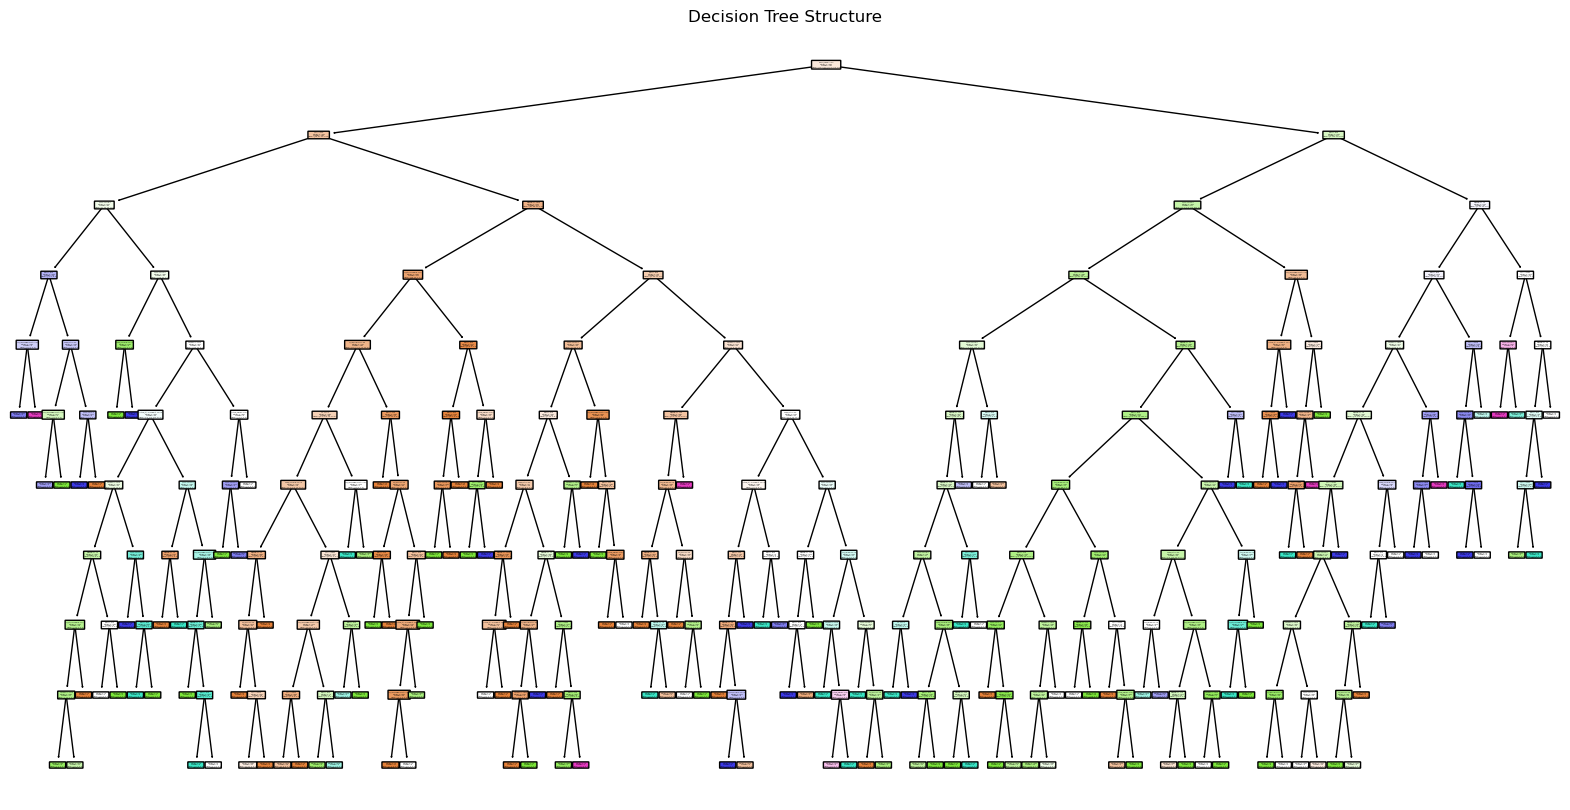

In [93]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=[str(label) for label in y.unique()], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


In [95]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_clf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

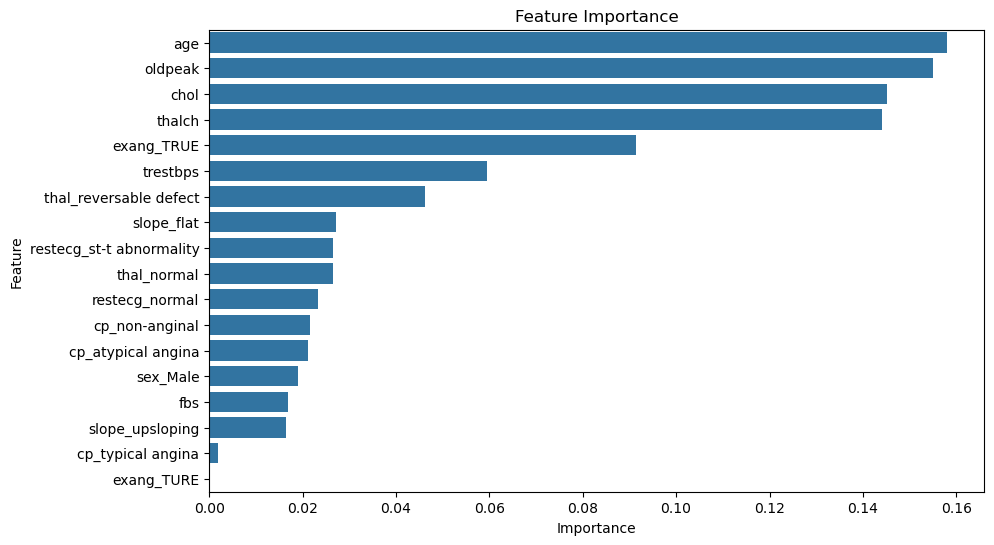

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance")
plt.show()


In [ ]:
# criterion: Defines the function to measure the quality of a split ('gini' or 'entropy'). It affects how splits are made.
# max_depth: Limits the maximum depth of the tree to control overfitting.
#  min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent overfitting.
# min_samples_leaf: The minimum number of samples required to form a leaf. Controls overfitting by making the tree less complex.
# max_features: The number of features to consider when looking for the best split. Reduces variance by limiting splits.

In [ ]:
#Label Encoding**: Assigns each unique category a numeric label (e.g., 'A' -> 0, 'B' -> 1). It is simple but introduces ordinal relationships.
# - **One-Hot Encoding**: Converts categories into binary columns (e.g., 'A' -> [1, 0], 'B' -> [0, 1]). Eliminates ordinal relationships but increases dimensionality.
